In [41]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
from matplotlib import pyplot as plt

In [2]:
# data
data = pd.read_pickle('../data/cleaned_train.pkl')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## bi-variant distributions

In [27]:
def bi_dist(x,y,df,hue=None,kind='hist',palette=None,fill=True):
    plt.figure(figsize=[12,6],dpi=300)
    if kind == 'kde':
        sns.displot(x=x,y=y,hue=hue,data=df,height=8,kind=kind,palette=palette,fill=fill)
    else:
        sns.displot(x=x,y=y,hue=hue,data=df,height=8,kind=kind,palette=palette)

    plt.show()

<Figure size 3600x1800 with 0 Axes>

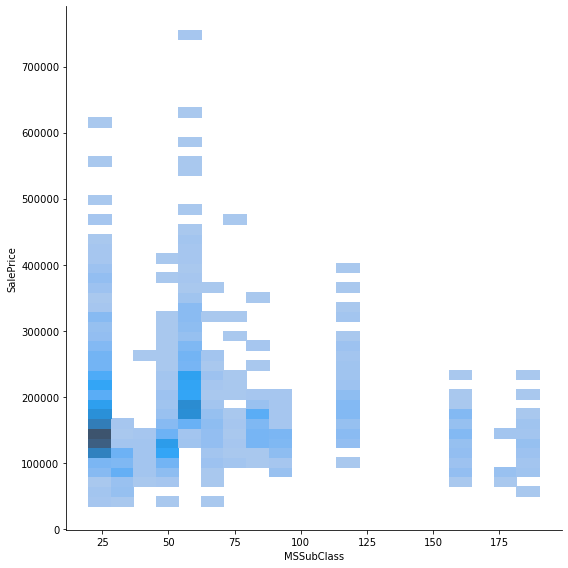

In [28]:
bi_dist(x='MSSubClass',y='SalePrice',df=data)

<Figure size 3600x1800 with 0 Axes>

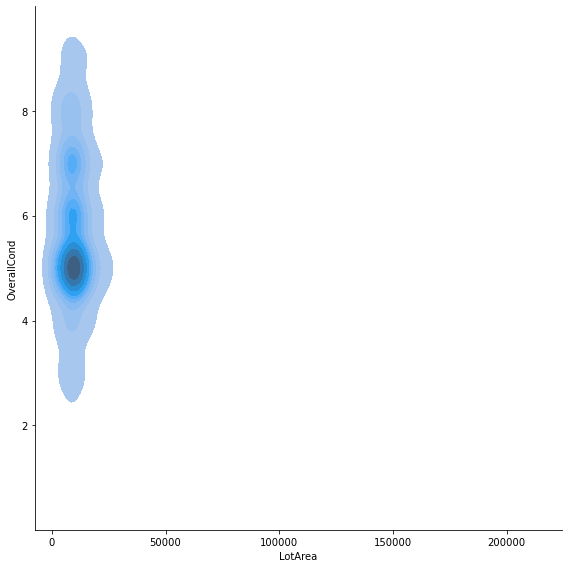

In [29]:
bi_dist(x='LotArea',y='OverallCond',df=data,kind='kde')

<Figure size 3600x1800 with 0 Axes>

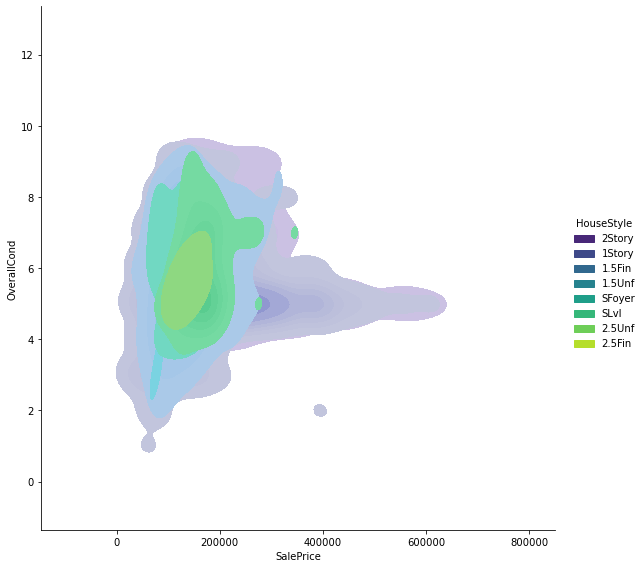

In [32]:
bi_dist(x='SalePrice',y='OverallCond',hue='HouseStyle',df=data,kind='kde',palette='viridis')

<Figure size 3600x1800 with 0 Axes>

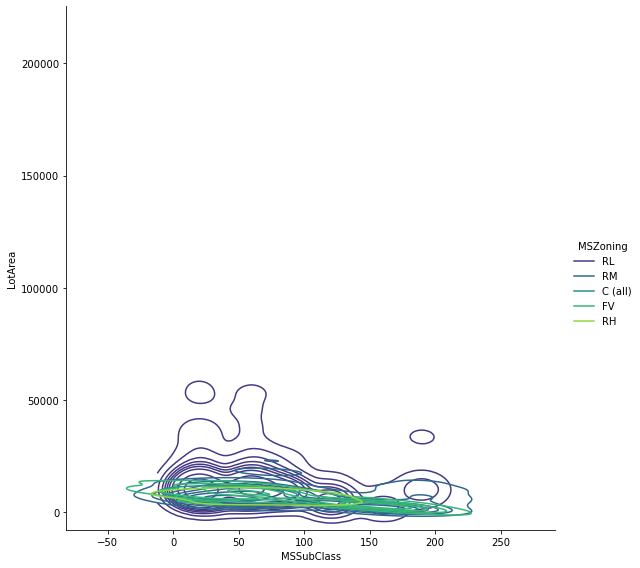

In [40]:
bi_dist(x='MSSubClass',y='LotArea',hue='MSZoning',df=data,kind='kde',palette='viridis',fill=False)

In [51]:
def bi_rel(x,y,df,hue=None,palette=None):
    plt.figure(figsize=[12,6],dpi=300)
    sns.scatterplot(x=x,y=y,data=df,hue=hue,palette=palette)
    plt.show()

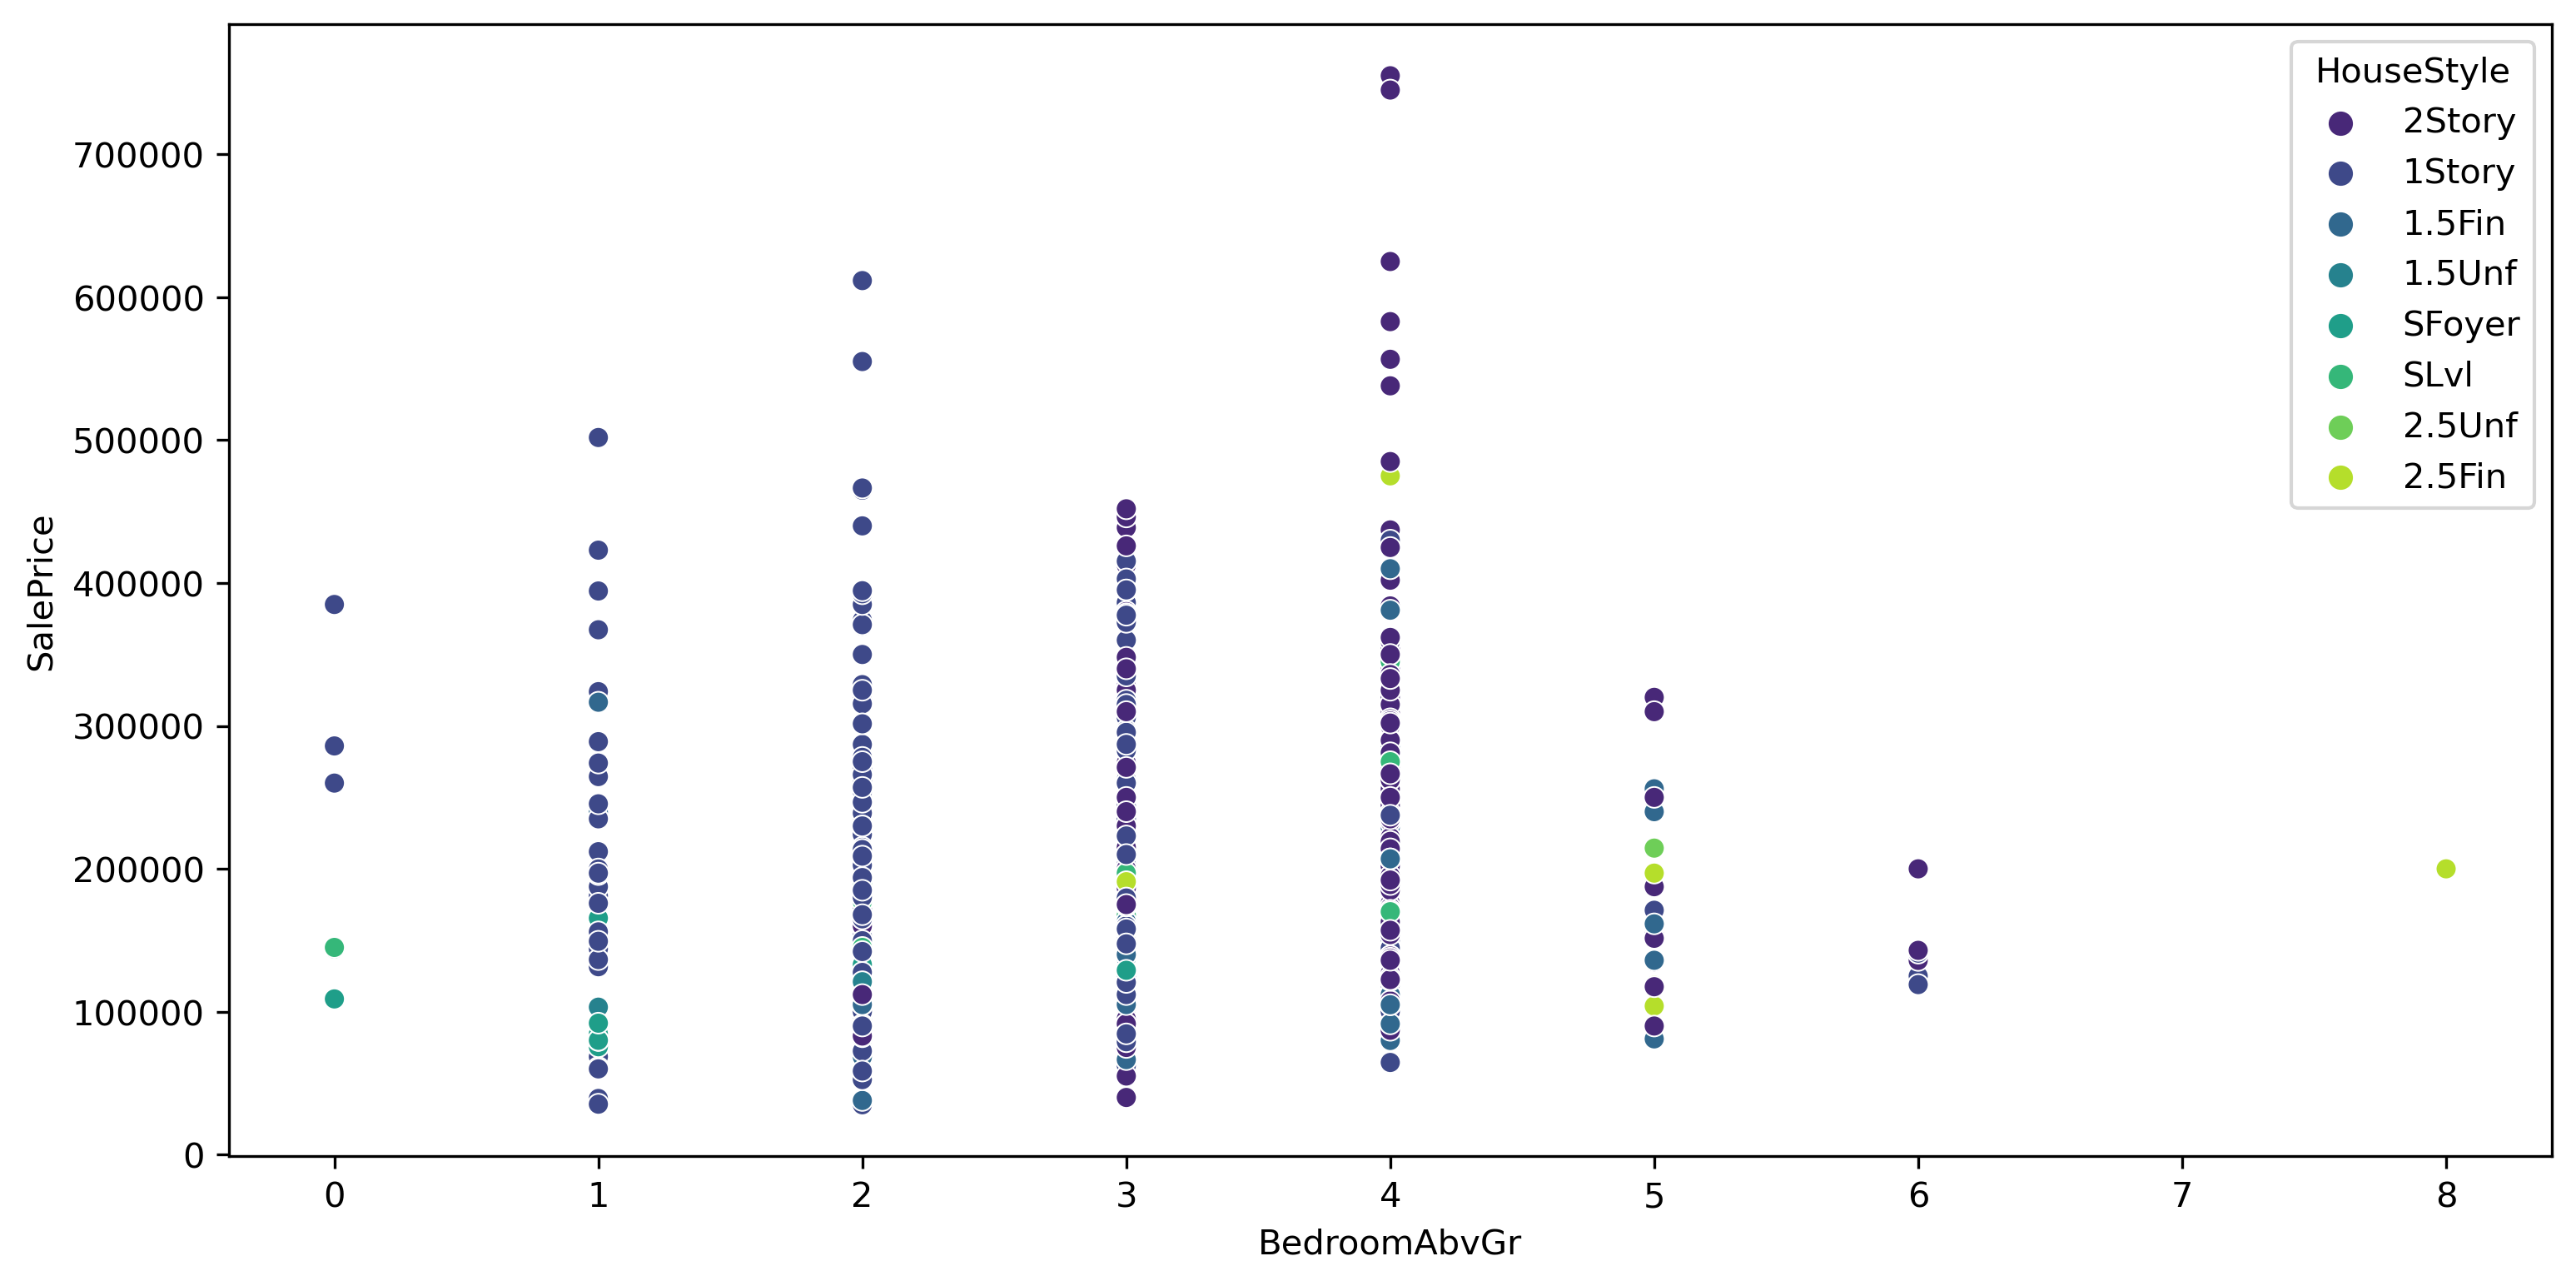

In [52]:
bi_rel(x='BedroomAbvGr',y='SalePrice',hue='HouseStyle',df=data,palette='viridis')

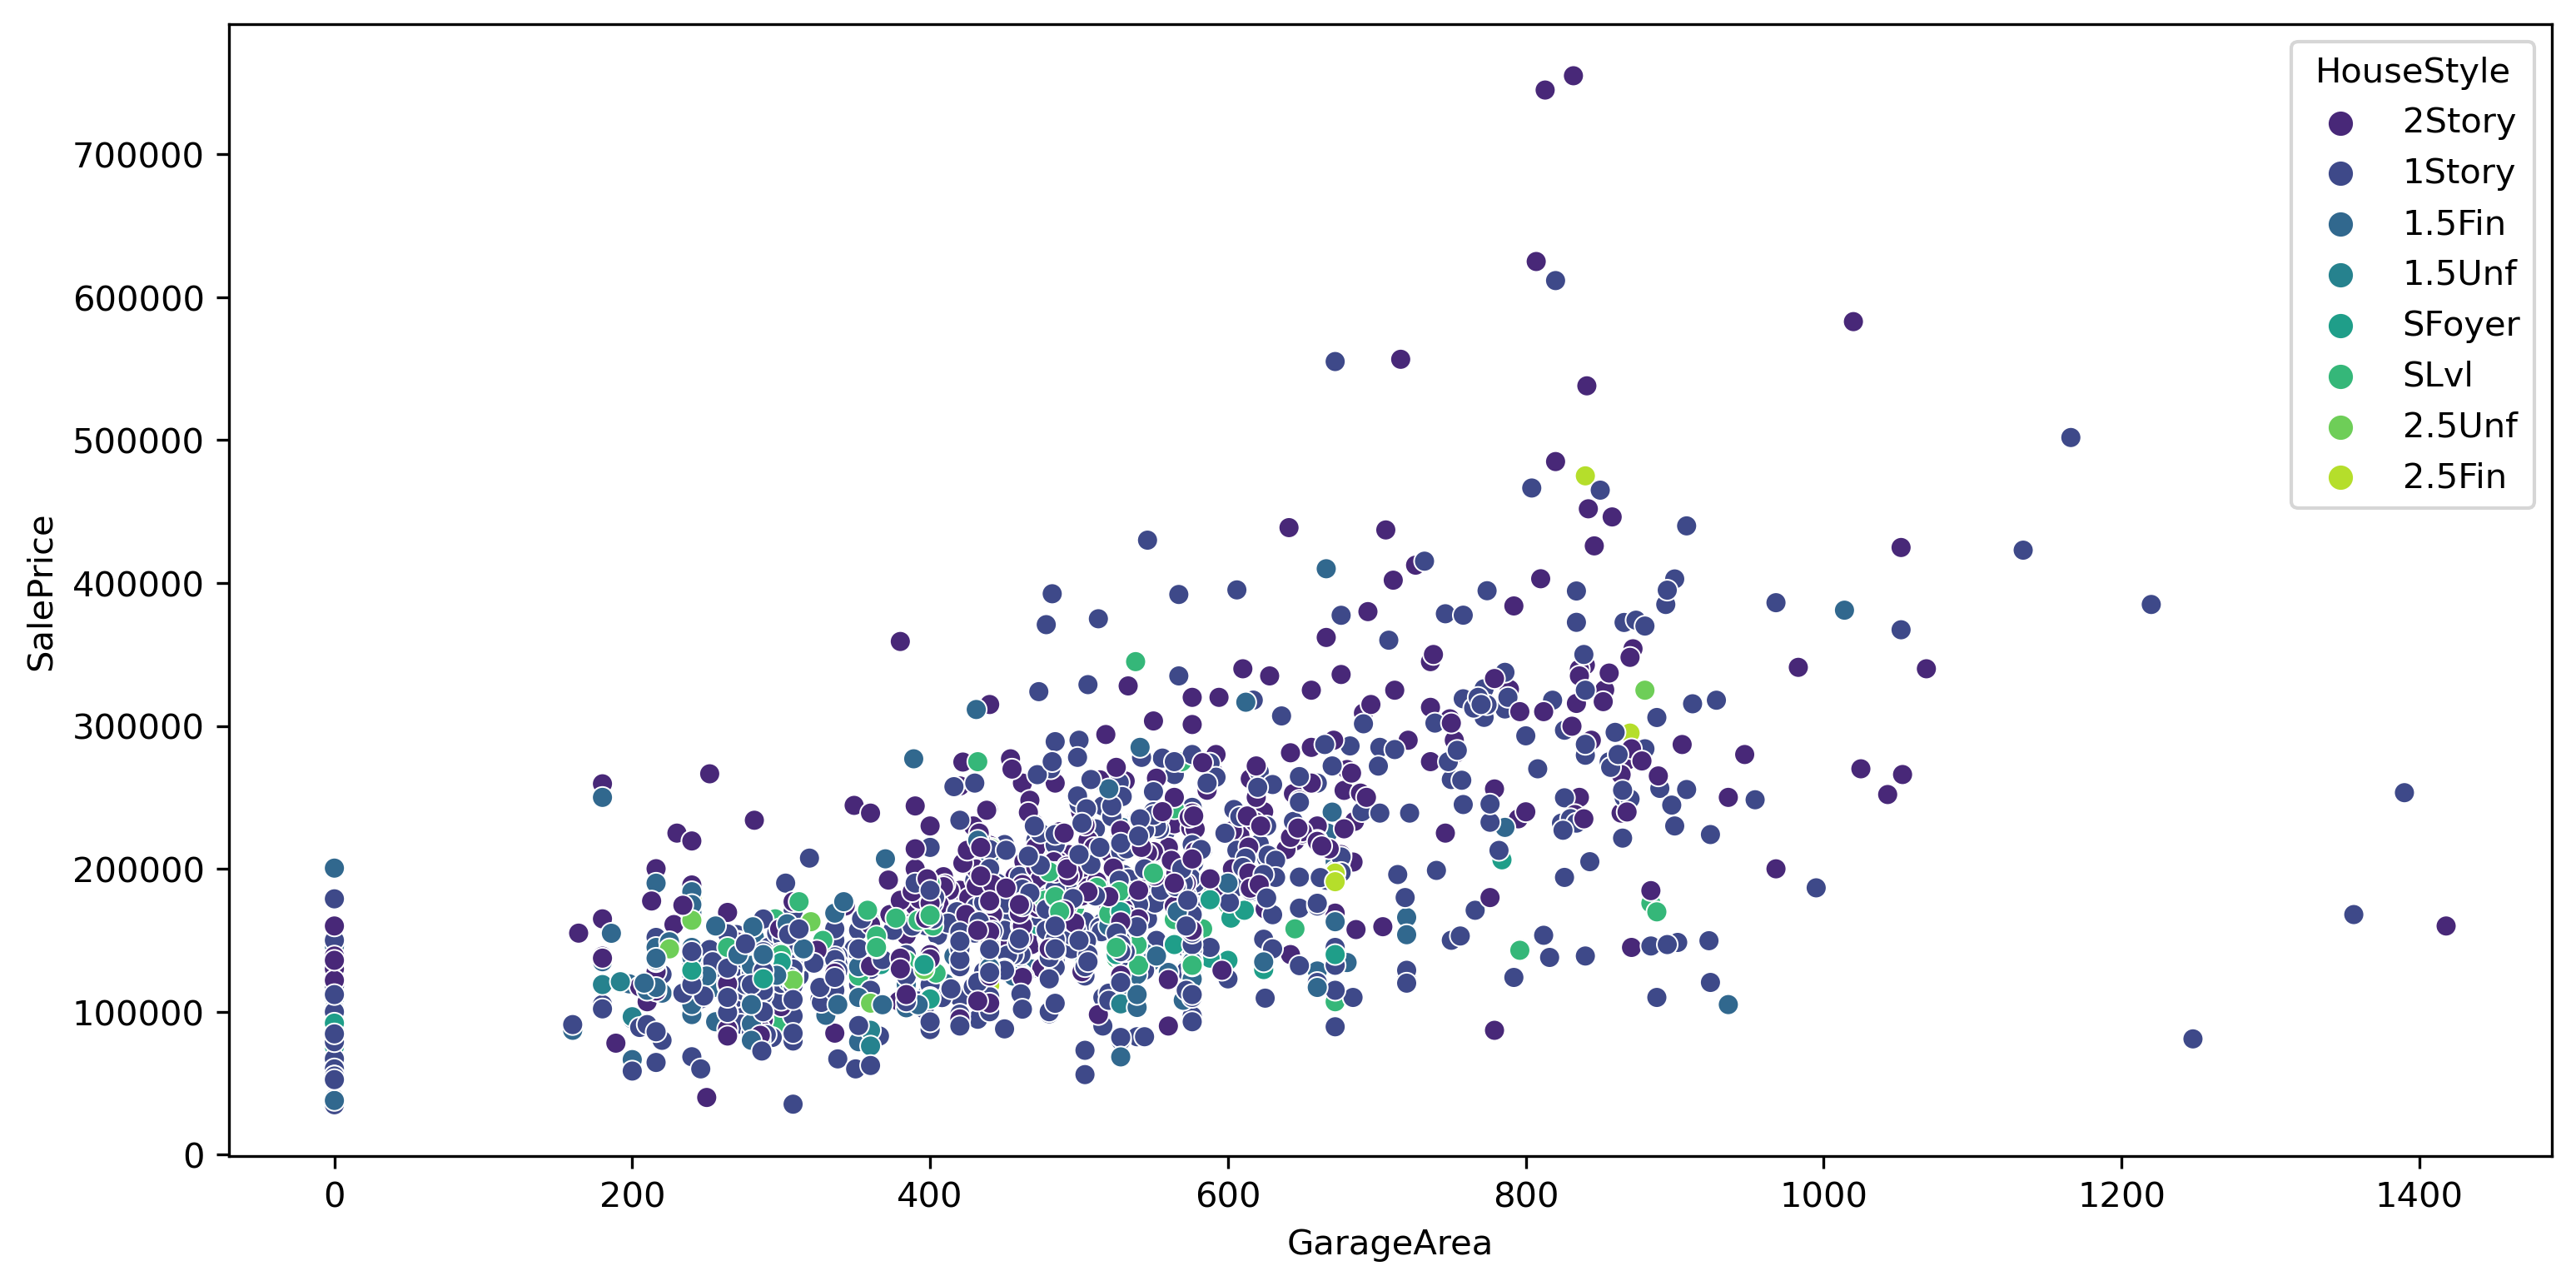

In [53]:
bi_rel(x='GarageArea',y='SalePrice',hue='HouseStyle',df=data,palette='viridis')

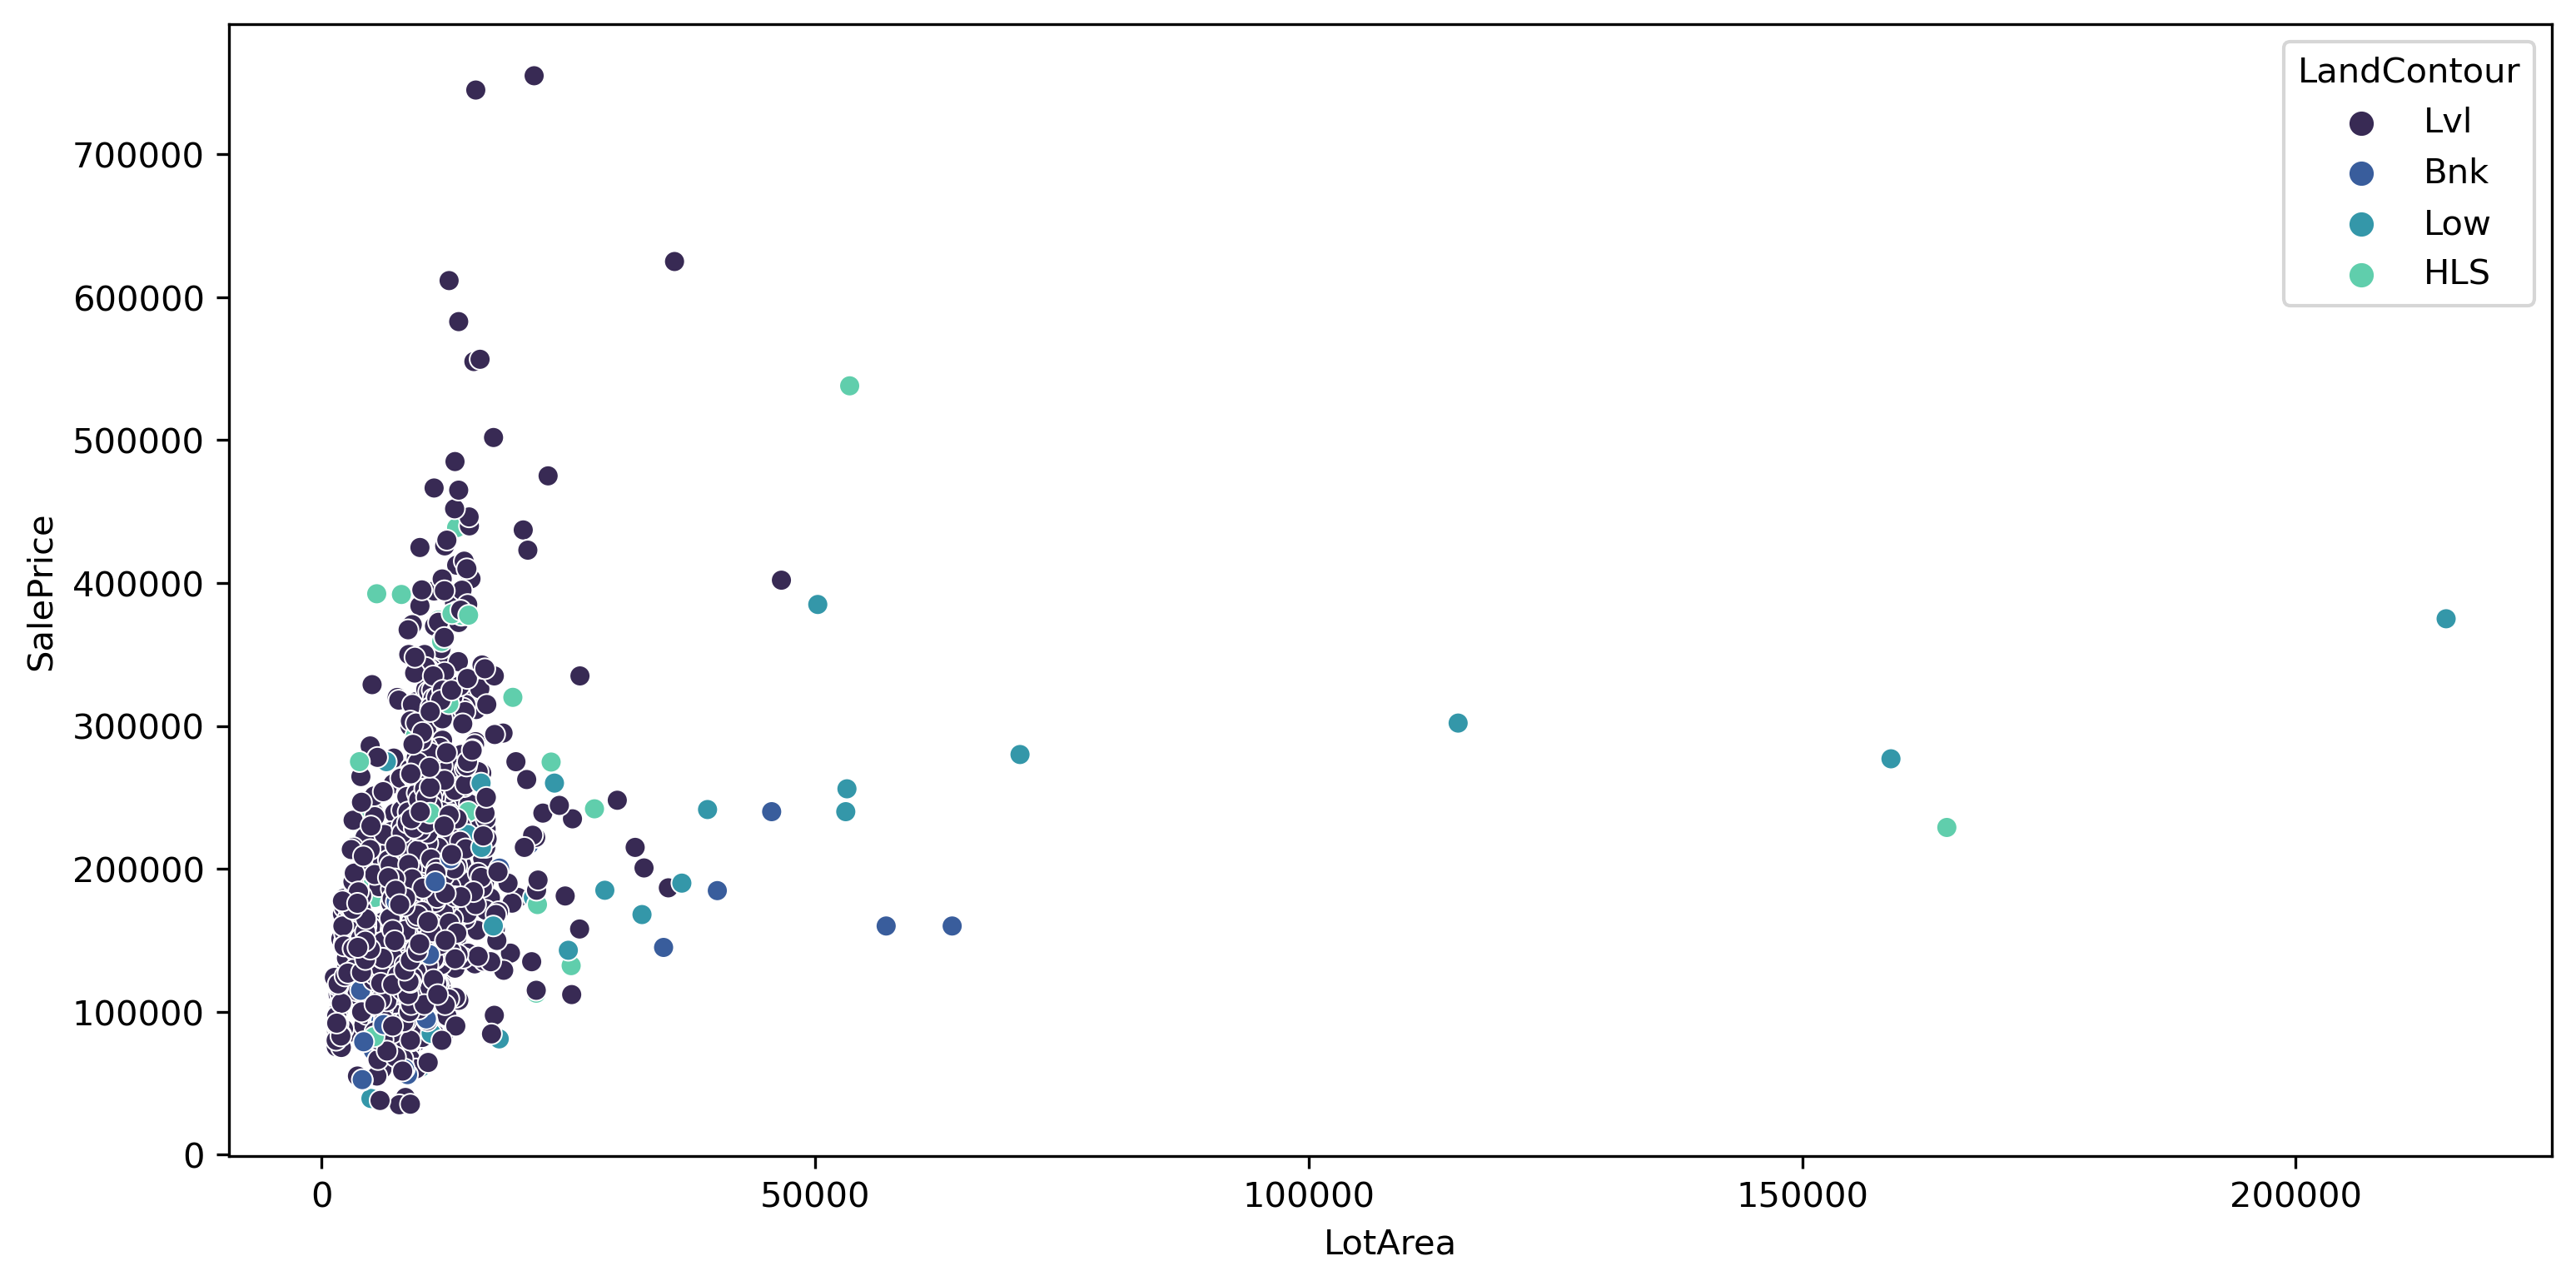

In [56]:
bi_rel(x='LotArea',y='SalePrice',hue='LandContour',df=data,palette='mako')

In [50]:
x = data['LotArea'].values
y = data['LotFrontage'].values
z = data['SalePrice'].values

trace_1 = go.Scatter3d(x=x,y=y,z=z,
                       mode='markers',
                       marker=dict(size=12,
                                   color='#3EB595',
                                   line=dict(color='#ffffff',
                                             width=0.5),
                                   opacity=0.8))
gr_data = trace_1
gr_layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Lot size in square feet'),
        yaxis=dict(title='Linear feet of street connected to property'),
        zaxis=dict(title='sale price')
    )
)

graph = go.Figure(data=gr_data,layout=gr_layout)
plot(graph)

'temp-plot.html'

In [47]:
data['']